## 1. Evolution of Total Child Support Payments Over the Last Five Years

In [25]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq


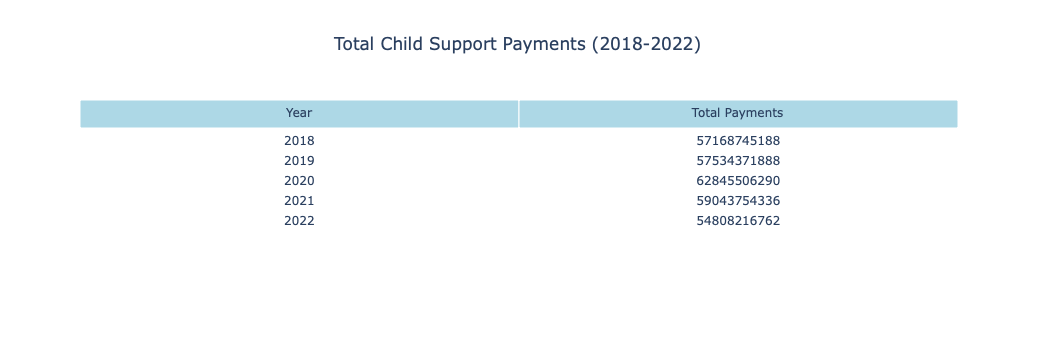

In [67]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the Excel file specifically from the 'P-4' sheet
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p4 = pd.read_excel(file_path, sheet_name='P-4')

# Rename the columns for clarity
table_p4.columns = ['State', '2018', '2019', '2020', '2021', '2022']

# Remove the first two rows which are not part of the data
table_p4 = table_p4.drop([0, 1])

# Convert the year columns to numeric values
table_p4[['2018', '2019', '2020', '2021', '2022']] = table_p4[['2018', '2019', '2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year
total_payments = table_p4[['2018', '2019', '2020', '2021', '2022']].sum()

# Create a Plotly table with blue and white colors
fig = go.Figure(data=[go.Table(
    header=dict(values=['Year', 'Total Payments'], fill_color='lightblue', align='center'),
    cells=dict(values=[total_payments.index, total_payments], fill_color='white', align='center'))
])

# Customize the layout of the table
fig.update_layout(title='Total Child Support Payments (2018-2022)', title_x=0.5)

# Show the table
fig.show()


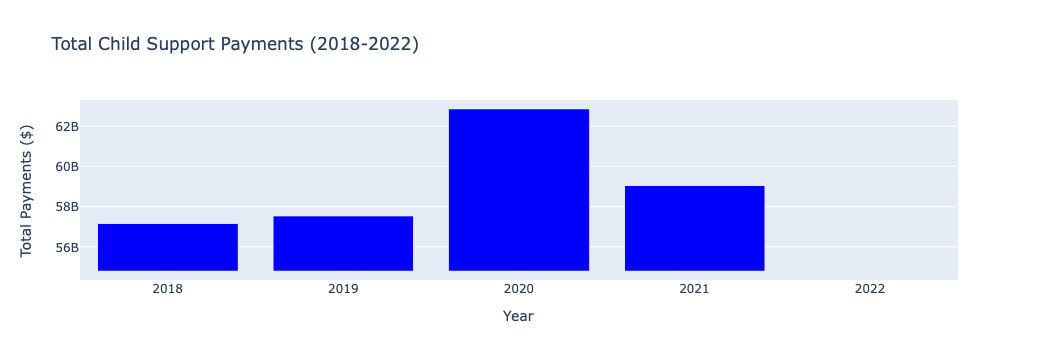

In [59]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the Excel file specifically from the 'P-4' sheet
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p4 = pd.read_excel(file_path, sheet_name='P-4')

# Rename the columns for clarity
table_p4.columns = ['State', '2018', '2019', '2020', '2021', '2022']

# Remove the first two rows which are not part of the data
table_p4 = table_p4.drop([0, 1])

# Convert the year columns to numeric values
table_p4[['2018', '2019', '2020', '2021', '2022']] = table_p4[['2018', '2019', '2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year
total_payments = table_p4[['2018', '2019', '2020', '2021', '2022']].sum()

# Create a bar chart with adjusted bar width and height
fig = go.Figure(data=go.Bar(
    x=total_payments.index,
    y=total_payments - total_payments.min(),  # Increase the height of the bars
    base=total_payments.min(),  # Set the base to increase bar height
    marker_color='blue',  # Color of the bars
))

# Customize the layout of the chart
fig.update_layout(
    title='Total Child Support Payments (2018-2022)',
    xaxis_title='Year',
    yaxis_title='Total Payments ($)',
)

fig.show()


## 2. Are there any specific trends or changes in child support payments during this period?

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the data from the Excel file specifically from the 'P-4' sheet
ile_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p4 = pd.read_excel('/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx', sheet_name='P-4')

# Rename the columns for clarity
table_p4.columns = ['State', '2018', '2019', '2020', '2021', '2022']

# Drop non-relevant rows if they exist
if 0 in table_p4.index and 1 in table_p4.index:
    table_p4 = table_p4.drop([0, 1])

# Convert the year columns to numeric values
table_p4[['2018', '2019', '2020', '2021', '2022']] = table_p4[['2018', '2019', '2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year
total_payments = table_p4[['2018', '2019', '2020', '2021', '2022']].sum()

# Calculate year-over-year absolute change and percentage change
yearly_change = total_payments.diff()
percentage_change = total_payments.pct_change() * 100

# Formatting the output to display numbers without scientific notation
formatted_yearly_change = yearly_change.apply(lambda x: f"{x:,.2f}")
formatted_percentage_change = percentage_change.apply(lambda x: f"{x:.2f}%")

# Print the formatted changes
print("Year-over-Year Change:")
print(formatted_yearly_change)
print("\nPercentage Change:")
print(formatted_percentage_change)


Year-over-Year Change:
2018                  nan
2019       365,626,700.00
2020     5,311,134,402.00
2021    -3,801,751,954.00
2022    -4,235,537,574.00
dtype: object

Percentage Change:
2018      nan%
2019     0.64%
2020     9.23%
2021    -6.05%
2022    -7.17%
dtype: object


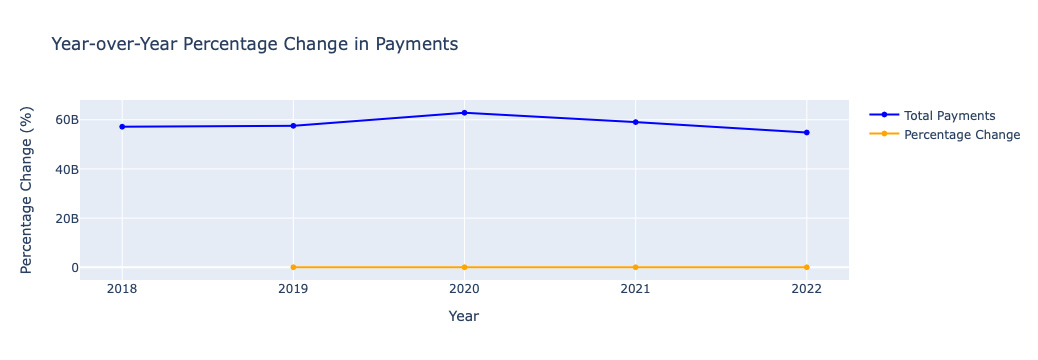

In [71]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the Excel file specifically from the 'P-4' sheet
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p4 = pd.read_excel(file_path, sheet_name='P-4')

# Rename the columns for clarity
table_p4.columns = ['State', '2018', '2019', '2020', '2021', '2022']

# Drop non-relevant rows if they exist
if 0 in table_p4.index and 1 in table_p4.index:
    table_p4 = table_p4.drop([0, 1])

# Convert the year columns to numeric values
table_p4[['2018', '2019', '2020', '2021', '2022']] = table_p4[['2018', '2019', '2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year
total_payments = table_p4[['2018', '2019', '2020', '2021', '2022']].sum()

# Calculate year-over-year absolute change and percentage change
yearly_change = total_payments.diff()
percentage_change = total_payments.pct_change() * 100

# Create a line chart for total payments
fig = go.Figure()
fig.add_trace(go.Scatter(x=total_payments.index, y=total_payments, mode='lines+markers', name='Total Payments', marker=dict(color='blue')))
fig.update_layout(title='Total Child Support Payments (2018-2022)',
                  xaxis_title='Year',
                  yaxis_title='Total Payments ($)',
                  showlegend=True)

# Create a line chart for year-over-year percentage change
fig.add_trace(go.Scatter(x=percentage_change.index, y=percentage_change, mode='lines+markers', name='Percentage Change', marker=dict(color='orange')))
fig.update_layout(title='Year-over-Year Percentage Change in Payments',
                  xaxis_title='Year',
                  yaxis_title='Percentage Change (%)',
                  showlegend=True)

fig.show()


## 3. Which years saw the most significant growth or decline in total child support payments?

In [16]:
import pandas as pd

# Load the data from the Excel file 
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p4 = pd.read_excel(file_path, sheet_name='P-4')

# Rename the columns for clarity
table_p4.columns = ['State', '2018', '2019', '2020', '2021', '2022']

# Drop non-relevant rows if they exist
if 0 in table_p4.index and 1 in table_p4.index:
    table_p4 = table_p4.drop([0, 1])

# Convert the year columns to numeric values
table_p4[['2018', '2019', '2020', '2021', '2022']] = table_p4[['2018', '2019', '2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year
total_payments = table_p4[['2018', '2019', '2020', '2021', '2022']].sum()

# Calculate year-over-year absolute change and percentage change
yearly_change = total_payments.diff()
percentage_change = total_payments.pct_change() * 100

# Find the year with the largest absolute increase
max_increase_year = yearly_change.idxmax()
max_increase_value = yearly_change.max()

# Find the year with the largest absolute decrease
max_decrease_year = yearly_change.idxmin()
max_decrease_value = yearly_change.min()

# Find the year with the largest percentage increase
max_percentage_increase_year = percentage_change.idxmax()
max_percentage_increase_value = percentage_change.max()

# Find the year with the largest percentage decrease
max_percentage_decrease_year = percentage_change.idxmin()
max_percentage_decrease_value = percentage_change.min()

print("Year with the Largest Absolute Increase:")
print(max_increase_year)
print("Value:", max_increase_value)

print("\nYear with the Largest Absolute Decrease:")
print(max_decrease_year)
print("Value:", max_decrease_value)

print("\nYear with the Largest Percentage Increase:")
print(max_percentage_increase_year)
print("Value:", max_percentage_increase_value)

print("\nYear with the Largest Percentage Decrease:")
print(max_percentage_decrease_year)
print("Value:", max_percentage_decrease_value)


Year with the Largest Absolute Increase:
2020
Value: 5311134402.0

Year with the Largest Absolute Decrease:
2022
Value: -4235537574.0

Year with the Largest Percentage Increase:
2020
Value: 9.231237306872808

Year with the Largest Percentage Decrease:
2022
Value: -7.173557341724656


## 4. Is there a consistent pattern in the increase or decrease of these payments?

In [17]:
import pandas as pd

# Load the data from the Excel file
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p4 = pd.read_excel(file_path, sheet_name='P-4')

# Rename the columns for clarity
table_p4.columns = ['State', '2018', '2019', '2020', '2021', '2022']

# Drop non-relevant rows if they exist
if 0 in table_p4.index and 1 in table_p4.index:
    table_p4 = table_p4.drop([0, 1])

# Convert the year columns to numeric values
table_p4[['2018', '2019', '2020', '2021', '2022']] = table_p4[['2018', '2019', '2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the total payments for each year
total_payments = table_p4[['2018', '2019', '2020', '2021', '2022']].sum()

# Calculate year-over-year absolute change and percentage change
yearly_change = total_payments.diff()
percentage_change = total_payments.pct_change() * 100

# Calculate the average percentage change
average_percentage_change = percentage_change.mean()

# Determine if there is a consistent pattern
if average_percentage_change > 0:
    pattern = "Consistently Increasing"
elif average_percentage_change < 0:
    pattern = "Consistently Decreasing"
else:
    pattern = "No Consistent Pattern"

print("Average Percentage Change:", average_percentage_change)
print("Pattern:", pattern)


Average Percentage Change: -0.8380311754155043
Pattern: Consistently Decreasing


## 5. Combining actual figures with percentage changes (from a table like P-3) enables a more nuanced trend analysis. It can illustrate not just the trend but also the rate of change, which can be crucial for understanding the dynamics of the program.

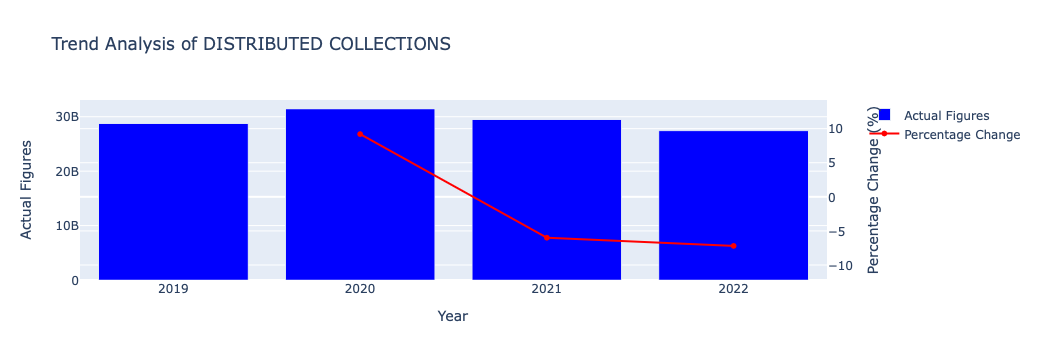

In [92]:
import pandas as pd
import plotly.graph_objs as go

# Load the data
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx'
table_p3 = pd.read_excel(file_path, sheet_name='P-3')

# Select only the row for 'DISTRIBUTED COLLECTIONS'
distributed_collections = table_p3.loc[table_p3.iloc[:, 0] == 'DISTRIBUTED COLLECTIONS']

# Extract actual figures and percentage changes
actual_figures = distributed_collections.iloc[0, [1, 2, 4, 6]].tolist()  # Actual figures for 2019, 2020, 2021, 2022
percent_changes = distributed_collections.iloc[0, [3, 5, 7]].tolist()  # Percentage changes for 2019-2020, 2020-2021, 2021-2022

# Convert percent changes to numeric and handle None or empty values
percent_changes_numeric = [float(str(val).strip('%')) if isinstance(val, str) and val.strip('%') else 0 for val in percent_changes]

# Years for plotting the percentage change, corresponding to the end of each period
percent_years = [2020, 2021, 2022]

# Correct the range for the secondary y-axis, filtering out zero values
valid_percent_changes = [val for val in percent_changes_numeric if val != 0]
y2_range = [min(valid_percent_changes) - 5, max(valid_percent_changes) + 5] if valid_percent_changes else [-5, 5]

# Plotting
fig = go.Figure()

# Adding bar chart for actual figures
fig.add_trace(go.Bar(
    x=years,
    y=actual_figures,
    name='Actual Figures',
    marker_color='blue'
))

# Adding line chart for percentage changes
# Only plot the years where we have percentage change data
fig.add_trace(go.Scatter(
    x=percent_years,
    y=percent_changes_numeric,
    name='Percentage Change',
    mode='lines+markers',  # This will create both lines and markers for each data point
    marker_color='red',
    yaxis='y2'
))

# Updating layout to fix the x-axis, add a secondary y-axis, and move the legend outside the graph
fig.update_layout(
    title='Trend Analysis of DISTRIBUTED COLLECTIONS',
    xaxis=dict(
        title='Year',
        tickmode='array',
        tickvals=years,
        ticktext=[str(year) for year in years]
    ),
    yaxis=dict(
        title='Actual Figures',
        side='left'
    ),
    yaxis2=dict(
        title='Percentage Change (%)',
        overlaying='y',
        side='right',
        range=y2_range  # Use the corrected range
    ),
    legend=dict(
        x=1.05,  # Position the legend to the right of the plot
        y=1,
        bgcolor='rgba(255, 255, 255, 0.5)',  # Slightly transparent background for the legend for readability
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    # Add some margin to the right to ensure the legend fits without being cut off
    margin=dict(r=160)
)

fig.show()

## 6. What is the average child support payment per case in each year?

In [36]:
import plotly.express as px

# Since both variables are in rows, we need to adjust the way we're selecting the data from the dataframe.
# We'll use the iloc method to select the rows by index and then the correct columns for 'TOTAL SUPPORT ORDERS ESTABLISHED' and 'TOTALS'.
# The correct indices are provided for each sheet.

# Re-load the sheets to make sure we have the initial data
sheet_p3 = pd.read_excel(file_path, sheet_name='P-3')
sheet_p4 = pd.read_excel(file_path, sheet_name='P-4')

# For 'P-3', we're interested in the row with 'TOTAL SUPPORT ORDERS ESTABLISHED'
total_support_orders_p3 = sheet_p3[sheet_p3.iloc[:, 0] == 'TOTAL SUPPORT ORDERS ESTABLISHED']

# For 'P-4', we're interested in the row with 'TOTALS'
totals_p4 = sheet_p4[sheet_p4.iloc[:, 0] == 'TOTALS']

# Now we select the correct columns for each year for 'TOTAL SUPPORT ORDERS ESTABLISHED' (P-3)
# We expect these to be in columns 2, 3, 5, 7 (1-indexed), which correspond to 1, 2, 4, 6 (0-indexed)
total_support_orders_values = total_support_orders_p3.iloc[0, [1, 2, 4, 6]].values

# And the total distributed collections from 'P-4' are expected to be in columns 2, 3, 4, 5 (1-indexed)
total_distributed_collections_values = totals_p4.iloc[0, 1:5].values

# Calculate the average child support payment per case
average_payments = total_distributed_collections_values / total_support_orders_values

# Create a DataFrame with the results
average_child_support_df = pd.DataFrame({
    'Year': [2019, 2020, 2021, 2022],
    'Total Support Orders Established': total_support_orders_values,
    'Total Distributed Collections': total_distributed_collections_values,
    'Average Child Support Payment per Case': average_payments
})

average_child_support_df



,Year,Total Support Orders Established,Total Distributed Collections,Average Child Support Payment per Case
0,2019,837554.0,28584372594.0,34128.393625
1,2020,620114.0,28767185944.0,46390.157203
2,2021,610743.0,31422753145.0,51450.042235
3,2022,627223.0,29521877168.0,47067.593452


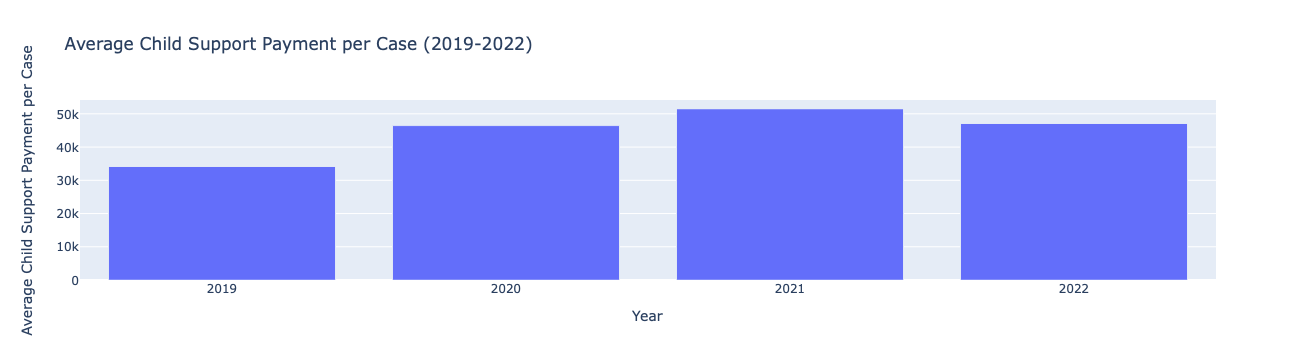

In [48]:
import pandas as pd
import plotly.express as px

# Recreate the DataFrame with the average child support payment per case

average_child_support_df = pd.DataFrame({
    'Year': ['2019', '2020', '2021', '2022'],  # Ensure these are strings
    'Average Child Support Payment per Case': average_payments  # Assuming this variable is defined with correct values
})

# Convert 'Year' to a string to ensure categorical x-axis in Plotly
average_child_support_df['Year'] = average_child_support_df['Year'].astype(str)

# Create a bar chart to visualize the average child support payment per case
fig = px.bar(
    average_child_support_df,
    x='Year',
    y='Average Child Support Payment per Case',
    title='Average Child Support Payment per Case (2019-2022)'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Child Support Payment per Case',
    xaxis=dict(type='category')  # Setting the x-axis to 'category' type
)

# Show the chart
fig.show()

## 7. How has the average payment amount changed annually?

In [49]:
# We already have the DataFrame 'average_child_support_df' with the relevant data
# To calculate the annual change in the average child support payment amount,
# we can use the 'diff' method which computes the difference of a DataFrame element compared with another element

# Calculate the annual change in average payment
average_child_support_df['Annual Change'] = average_child_support_df['Average Child Support Payment per Case'].diff()

# The 'diff' method will result in a NaN value for the first entry, which we can fill with zero or leave as NaN as there is no previous year in the dataset.
average_child_support_df

,Year,Average Child Support Payment per Case,Annual Change
0,2019,34128.393625,NaN
1,2020,46390.157203,12261.763579
2,2021,51450.042235,5059.885032
3,2022,47067.593452,-4382.448783


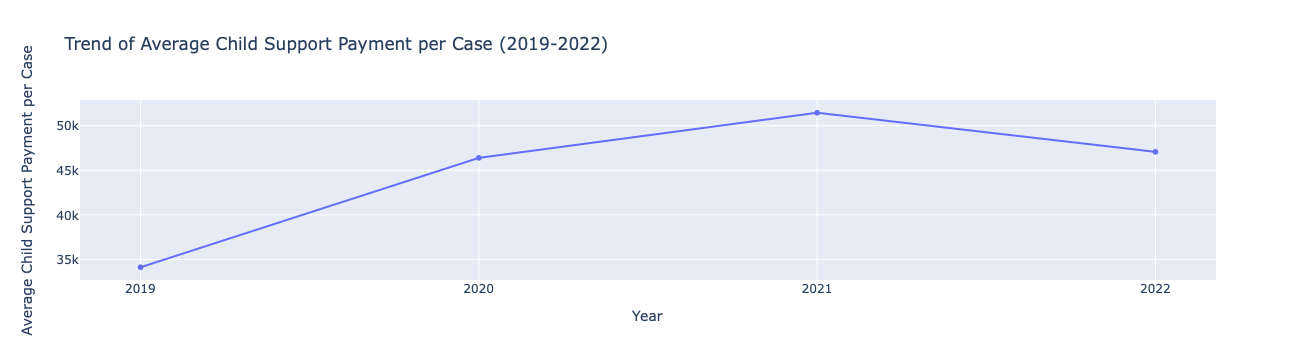

In [50]:
import pandas as pd
import plotly.express as px

#'average_child_support_df' is there
average_child_support_df = pd.DataFrame({
    'Year': [2019, 2020, 2021, 2022],
    'Total Support Orders Established': [837554, 620114, 610743, 627223],
    'Total Distributed Collections': [28584372594, 28767185944, 31422753145, 29521877168],
    'Average Child Support Payment per Case': [34128.39, 46390.16, 51450.04, 47067.59]
})

# Adding a column for annual change
average_child_support_df['Annual Change'] = average_child_support_df['Average Child Support Payment per Case'].diff()

# Create a line graph to show the trend of the average child support payment over the years
fig = px.line(average_child_support_df, x='Year', y='Average Child Support Payment per Case', 
              title='Trend of Average Child Support Payment per Case (2019-2022)',
              markers=True)

# Manually set the tick values for the x-axis to display only the years 2019, 2020, 2021, 2022
fig.update_xaxes(tickvals=[2019, 2020, 2021, 2022])

# Show the graph
fig.show()



## 8. Arrearages Trends

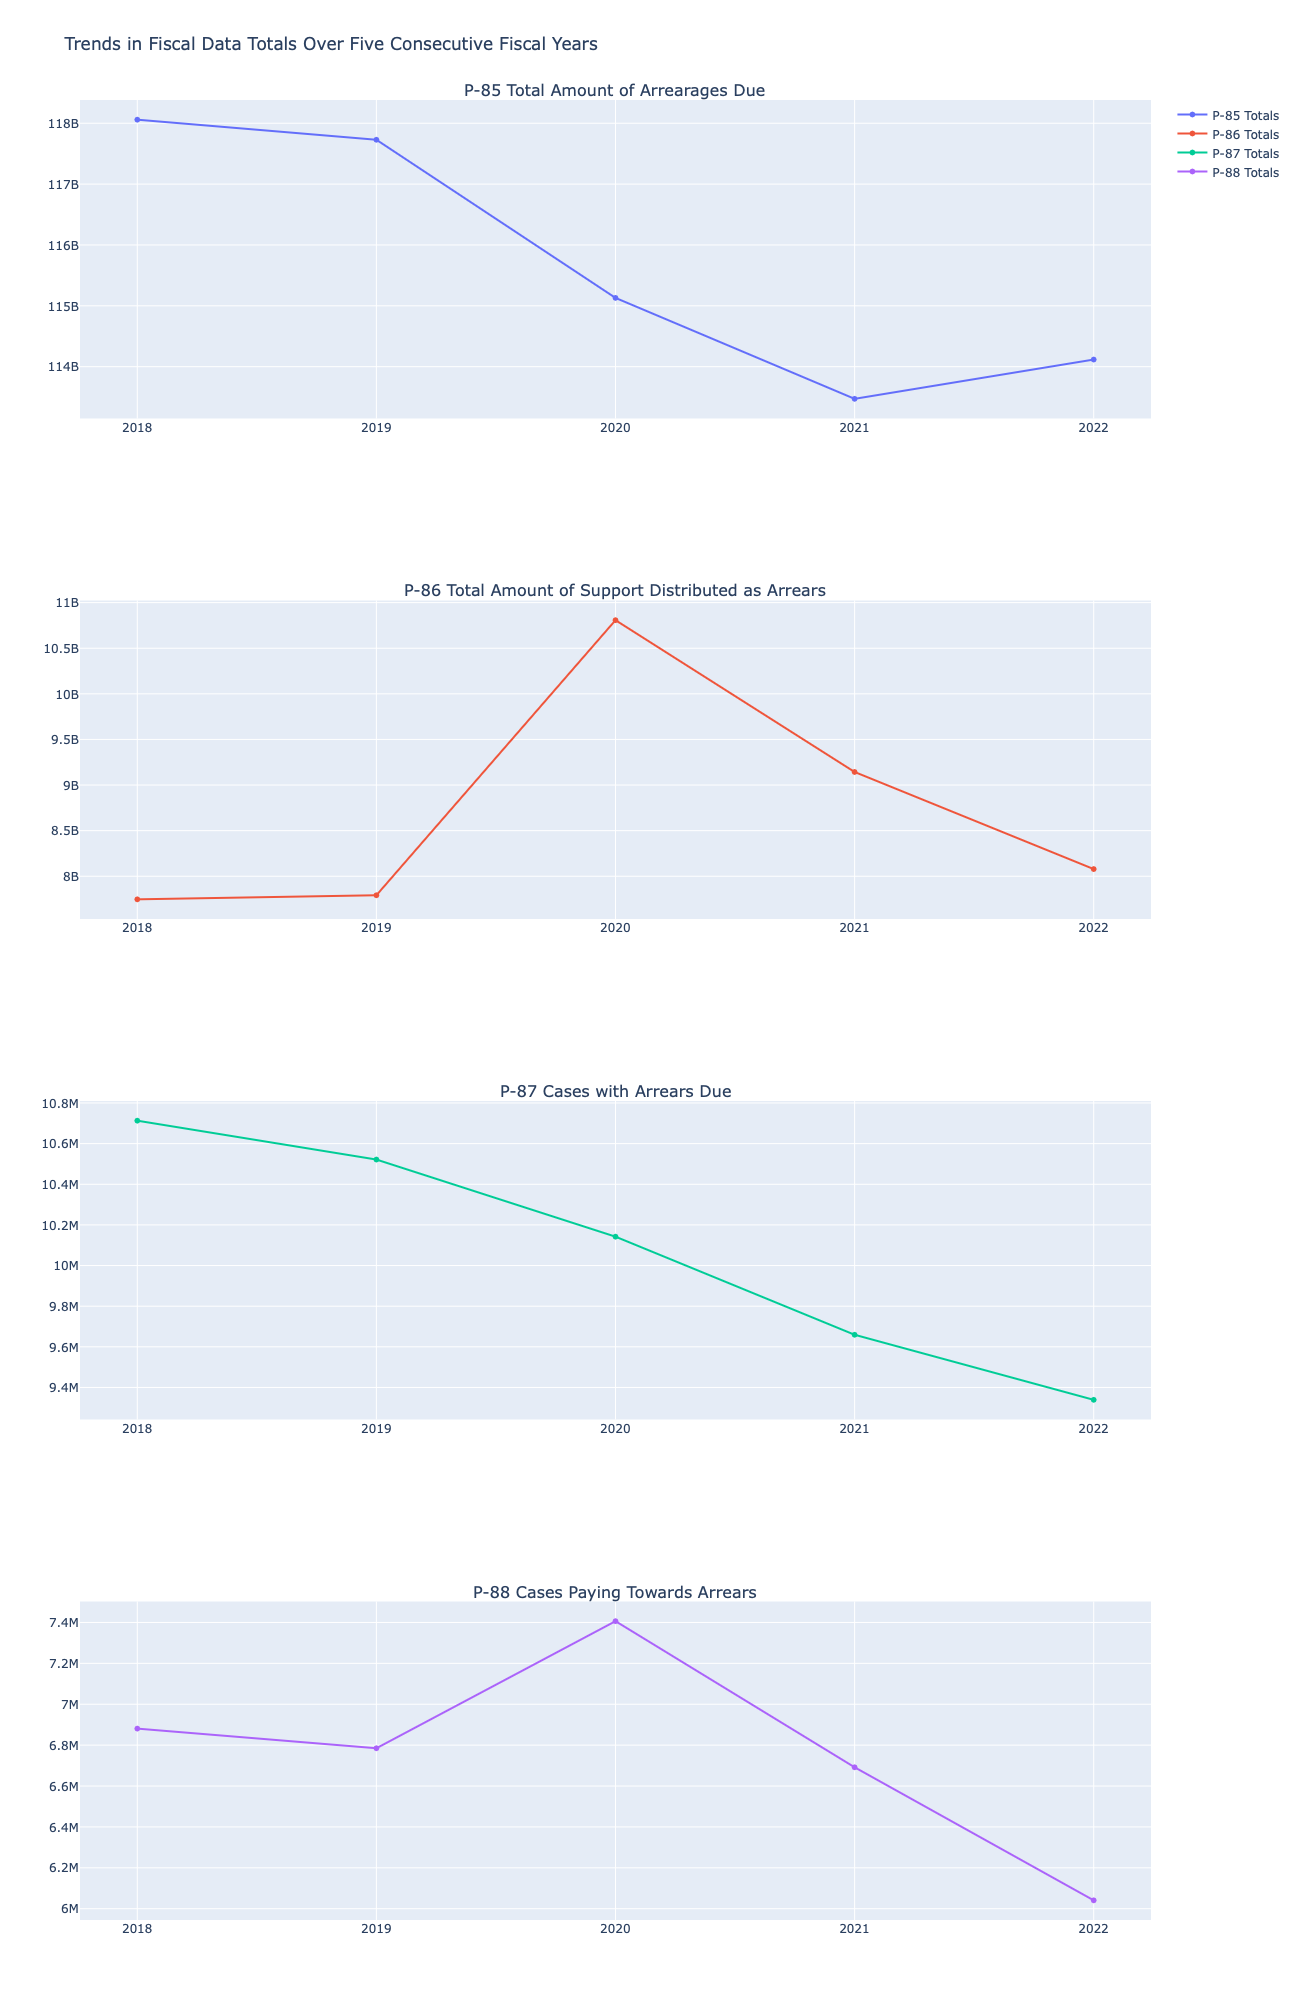

In [9]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Define the path to your Excel file
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx' 

# Function to extract data from the sheet
def extract_data(file_path, sheet_name):
    # Load the entire sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    # Extract years from row 3 (Python index 2) and columns B to F (Python indices 1 to 5)
    # Convert to integer first to remove any decimal, then to string
    years = data.iloc[2, 1:6].astype(int).astype(str)
    # Extract totals from row 58 (Python index 57) and columns B to F (Python indices 1 to 5)
    totals = data.iloc[57, 1:6]
    return years, totals

# Create subplots
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=(
        "P-85 Total Amount of Arrearages Due",
        "P-86 Total Amount of Support Distributed as Arrears",
        "P-87 Cases with Arrears Due",
        "P-88 Cases Paying Towards Arrears"
    ),
    vertical_spacing=0.1
)

# For each sheet from P-85 to P-88, extract totals and add a trace to the subplot
for i, sheet_name in enumerate(['P-85', 'P-86', 'P-87', 'P-88'], start=1):
    years, totals = extract_data(file_path, sheet_name)
    fig.add_trace(
        go.Scatter(x=years, y=totals, mode='lines+markers', name=f'{sheet_name} Totals'),
        row=i, col=1
    )

# Update layout
fig.update_layout(height=2000, showlegend=True, title_text="Trends in Fiscal Data Totals Over Five Consecutive Fiscal Years")

# Show the plot
fig.show()



## 9. How do payments under different assistance programs (like "Current Assistance IV-A and IV-E" and "Former Assistance IV-A and IV-E") compare?

Current Assistance IV-A and IV-E Totals:
1    144283287.0
2    134515316.0
3    132573797.0
4    126810833.0
5    109197168.0
Name: 57, dtype: float64

Former Assistance IV-A and IV-E Totals:
1    229016321.0
2    237581239.0
3    246144850.0
4    246337993.0
5    220596607.0
Name: 57, dtype: float64

Comparison of Current vs Former Assistance Totals:
   Year  Current Assistance Totals  Former Assistance Totals   Difference
1  2018                144283287.0               229016321.0   84733034.0
2  2019                134515316.0               237581239.0  103065923.0
3  2020                132573797.0               246144850.0  113571053.0
4  2021                126810833.0               246337993.0  119527160.0
5  2022                109197168.0               220596607.0  111399439.0


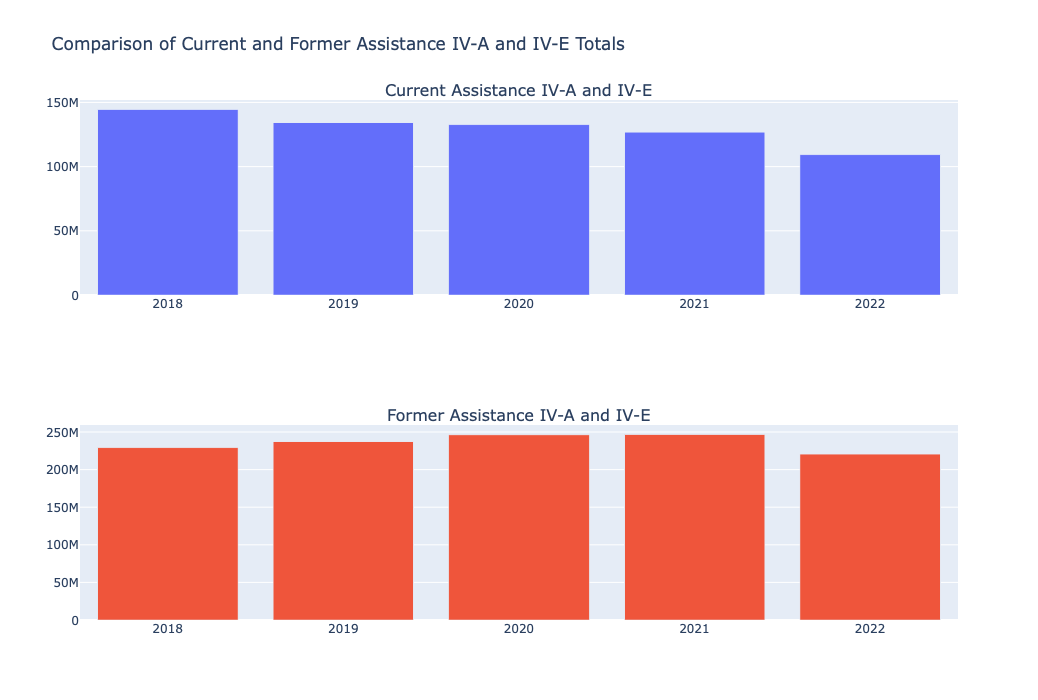

In [14]:
import pandas as pd

# Load the Excel file
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx' 

# Read the sheets for current and former assistance
current_assistance_data = pd.read_excel(file_path, sheet_name='P-23', header=None)
former_assistance_data = pd.read_excel(file_path, sheet_name='P-24', header=None)

# Extracting the years from the third row, columns B to F
years = current_assistance_data.iloc[2, 1:6].astype(int).astype(str)  # Converting to int then to str for year labels

# Extracting totals for Current and Former Assistance from row 58, columns B to F
current_assistance_totals = current_assistance_data.iloc[57, 1:6]
former_assistance_totals = former_assistance_data.iloc[57, 1:6]

# Converting the totals to numeric values for analysis
current_assistance_totals = pd.to_numeric(current_assistance_totals)
former_assistance_totals = pd.to_numeric(former_assistance_totals)

# Analysis
print("Current Assistance IV-A and IV-E Totals:")
print(current_assistance_totals)
print("\nFormer Assistance IV-A and IV-E Totals:")
print(former_assistance_totals)

# Comparison of Current vs Former Assistance Totals
comparison = pd.DataFrame({
    'Year': years,
    'Current Assistance Totals': current_assistance_totals.values,
    'Former Assistance Totals': former_assistance_totals.values
})

# Calculate the difference between Current and Former Assistance Totals
comparison['Difference'] = comparison['Former Assistance Totals'] - comparison['Current Assistance Totals']

print("\nComparison of Current vs Former Assistance Totals:")
print(comparison)


import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming you have the 'years', 'current_assistance_totals', and 'former_assistance_totals' from earlier code

# Create a subplot for the current and former assistance totals
fig = make_subplots(rows=2, cols=1, subplot_titles=("Current Assistance IV-A and IV-E", "Former Assistance IV-A and IV-E"))

# Add traces for the totals
fig.add_trace(
    go.Bar(x=years, y=current_assistance_totals, name='Current Assistance Totals'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=years, y=former_assistance_totals, name='Former Assistance Totals'),
    row=2, col=1
)

# Update layout for a clearer view
fig.update_layout(
    height=700,
    showlegend=False,
    title_text="Comparison of Current and Former Assistance IV-A and IV-E Totals"
)

# Show the plot
fig.show()




## 10. Which assistance programs have seen the most significant increase or decrease in payments over the years?

In [51]:
import pandas as pd

# 'years', 'current_assistance_totals', and 'former_assistance_totals' are defined before

# Create the DataFrame with the years and totals
data = pd.DataFrame({
    'Year': years,
    'Current Assistance': current_assistance_totals,
    'Former Assistance': former_assistance_totals
})

# Calculate the year-over-year percentage change for each program
data['Current Assistance Change'] = data['Current Assistance'].pct_change() * 100
data['Former Assistance Change'] = data['Former Assistance'].pct_change() * 100

# Check if valid indices are returned for each category
max_increase_current_idx = data['Current Assistance Change'].idxmax()
max_decrease_current_idx = data['Current Assistance Change'].idxmin()
max_increase_former_idx = data['Former Assistance Change'].idxmax()
max_decrease_former_idx = data['Former Assistance Change'].idxmin()

# Print results with a check for valid indices
if pd.notna(max_increase_current_idx):
    print(f"Most significant increase for Current Assistance: {data.iloc[max_increase_current_idx]}")
else:
    print("No significant increase for Current Assistance")

# Check if the index for decrease is within the DataFrame range
if 0 <= max_decrease_current_idx < len(data):
    print(f"Most significant decrease for Current Assistance: {data.iloc[max_decrease_current_idx]}")
else:
    print("No significant decrease for Current Assistance")

# Repeat the checks for Former Assistance
if pd.notna(max_increase_former_idx):
    print(f"Most significant increase for Former Assistance: {data.iloc[max_increase_former_idx]}")
else:
    print("No significant increase for Former Assistance")

if 0 <= max_decrease_former_idx < len(data):
    print(f"Most significant decrease for Former Assistance: {data.iloc[max_decrease_former_idx]}")
else:
    print("No significant decrease for Former Assistance")

# Calculate the largest overall change over the entire period for each program
total_change_current = data['Current Assistance'].iloc[-1] - data['Current Assistance'].iloc[0]
total_change_former = data['Former Assistance'].iloc[-1] - data['Former Assistance'].iloc[0]

print(f"Largest overall change for Current Assistance from 2018 to 2022: {total_change_current}")
print(f"Largest overall change for Former Assistance from 2018 to 2022: {total_change_former}")



Most significant increase for Current Assistance: Year                                2021
Current Assistance           126810833.0
Former Assistance            246337993.0
Current Assistance Change      -4.346986
Former Assistance Change        0.078467
Name: 4, dtype: object
No significant decrease for Current Assistance
Most significant increase for Former Assistance: Year                                2020
Current Assistance           132573797.0
Former Assistance            246144850.0
Current Assistance Change      -1.443344
Former Assistance Change        3.604498
Name: 3, dtype: object
No significant decrease for Former Assistance
Largest overall change for Current Assistance from 2018 to 2022: -35086119.0
Largest overall change for Former Assistance from 2018 to 2022: -8419714.0


## 11. By combining financial data (from a table like P-1) with statistical data (from a table like P-2), we can explore correlations between financial figures and statistical measures. For example, understanding how changes in financial allocations or collections are related to changes in case loads or assistance numbers.

In [52]:
# Print out the first few rows to inspect the headers and identify the correct column names
print(financial_data.head())
print(statistical_data.head())


   Table P-1 Financial Overview for Five Consecutive Fiscal Years  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

     Unnamed: 1    Unnamed: 2    Unnamed: 3    Unnamed: 4    Unnamed: 5  
0           NaN           NaN           NaN           NaN           NaN  
1  2.018000e+03  2.019000e+03  2.020000e+03  2.021000e+03  2.022000e+03  
2  2.858437e+10  2.876719e+10  3.142275e+10  2.952188e+10  2.740411e+10  
3  6.810649e+08  6.530521e+08  7.947070e+08  7.091390e+08  6.155291e+08  
4  8.444542e+09  8.322310e+09  9.590680e+09  8.775895e+09  7.573577e+09  
   Table P-2 Statistical Overview for Five Consecutive Fiscal Years  \
0                                                NaN                  

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the path to the Excel file
file_path = '/Users/asmafarooq/github/mids-datasci200-fall23-Asma-Farooq/fy_2022_preliminary_data_tables.xlsx' 

# Load the financial data from Table P-1
financial_data = pd.read_excel(file_path, sheet_name='P-1', skiprows=2)

# Load the statistical data from Table P-2
statistical_data = pd.read_excel(file_path, sheet_name='P-2', skiprows=2)

# The third row in the provided snippet seems to have the relevant data
financial_totals = financial_data.iloc[0, 1:6].values  # This assumes the totals are in the second row of the loaded data
statistical_totals = statistical_data.iloc[0, 1:6].values  # Same assumption as above

# Convert all non-numeric entries to NaN and convert the series to numeric
financial_totals = pd.to_numeric(financial_totals, errors='coerce')
statistical_totals = pd.to_numeric(statistical_totals, errors='coerce')

# Create a DataFrame from the loaded data
combined_data = pd.DataFrame({
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Total Collections': financial_totals,
    'Total Cases': statistical_totals
})

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Optional: Regression analysis
# Adding a constant for the intercept
X = sm.add_constant(combined_data['Total Cases'])  # Independent variable
y = combined_data['Total Collections']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                      Year  Total Collections  Total Cases
Year               1.00000          -0.171010    -0.996550
Total Collections -0.17101           1.000000     0.206255
Total Cases       -0.99655           0.206255     1.000000
                            OLS Regression Results                            
Dep. Variable:      Total Collections   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.277
Method:                 Least Squares   F-statistic:                    0.1333
Date:                Sat, 18 Nov 2023   Prob (F-statistic):              0.739
Time:                        15:57:16   Log-Likelihood:                -112.02
No. Observations:                   5   AIC:                             228.0
Df Residuals:                       3   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                

/Users/asmafarooq/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



## 12. What proportion of the total payments does each assistance category represent each year?